In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [30]:
def lanczosIteration(A, n, m):
    # garantir que nao vai realizar mais 
    # iteracoes do que a dimensao da matriz
    if (m > n):
        m = n
    # Criando matrizes zeradas
    tridiagonalMatrix = np.zeros((m, n))
    q = np.zeros((m+1, n))
    u = np.zeros((m, n))
    alfa = np.zeros(m)
    beta = np.zeros(m-1)
    y = []
    x = []
    # definido valores iniciaias
    x0 = np.random.uniform(size=(n))
    q[0] = np.array(x0 / np.linalg.norm(x0, ord=2))
    u[0] = A @ q[0]
    alfa[0] = q[0] @ u[0]
    u[0] = u[0] - (alfa[0]*q[0])
    # loop para geracao das diagonais
    for k in range(1, n): 
        beta[k-1] = np.linalg.norm(u[k-1], ord=2)
        q[k] = u[k-1]/beta[k-1]
        u[k] = A @ q[k]
        alfa[k] = q[k] @ u[k]
        u[k] = u[k] - (beta[k-1] * q[k-1]) - (alfa[k] * q[k])
        # Autovalores intermediarios
        a,b = np.linalg.eig(np.diag(alfa) + np.diag(beta, k=-1) + np.diag(beta, k=1))
        # Auto valores encontrados em cada iteracao
        nonZero = a[a!=0]
        for el in nonZero:
            x.append(el)
            y.append(k)

    # compondo matriz tridiagonal
    
    tridiagonalMatrix = np.diag(alfa) + np.diag(beta, k=-1) + np.diag(beta, k=1)
    plt.scatter(x,y)
    plt.xlabel('Auto Valores')
    plt.ylabel('Iteracao')
    
    #plt.show()
    plt.savefig('10.png')

    return tridiagonalMatrix
    


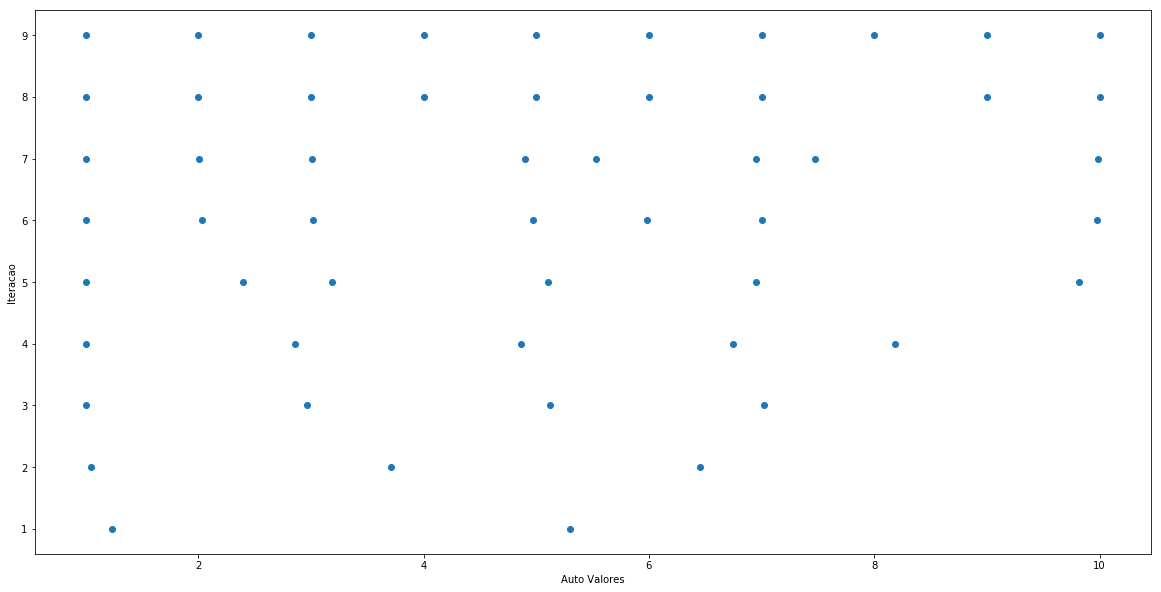

In [31]:
n = 10 # Dimensao da Matriz quadrada

# Matriz Diagonal D com diagonal
# crescente de 1 a n
D = np.diag(np.arange(1,n+1))


# B e uma matriz com valores aleatorios 
# uniformimente distribuida entre 0 e 1
# e possui dimensao n
B = np.random.uniform(size=(n,n))

# Fatorizacao QR de B
Q, R = np.linalg.qr(B)

# Gerando Matriz A sendo uma 
# matriz real e simetrica
A = Q @ D @ Q.T

tri = lanczosIteration(A, n, n)

